# Sparse Matrices

In [1]:
import numpy as np
from scipy import sparse

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from neuralyzer.im import smff

In [3]:
x = np.array([[1,2,0,0,0,], [2,1,2,0,0,], [0,2,1,2,0,], [0,0,2,1,2,], [0,0,0,2,1,]])

In [4]:
sparse.dia_matrix(x)

<5x5 sparse matrix of type '<type 'numpy.int64'>'
	with 13 stored elements (3 diagonals) in DIAgonal format>

In [5]:
np.dot(x,x)

array([[5, 4, 4, 0, 0],
       [4, 9, 4, 4, 0],
       [4, 4, 9, 4, 4],
       [0, 4, 4, 9, 4],
       [0, 0, 4, 4, 5]])

In [12]:
def gauss_kernel(size, var=None):    
    if type(size) == int:
        size = (size, size)
    else:
        raise ValueError('We only provide symmetric kernels with sizes specified by an int.')
    if not np.mod(size[0],2) or not np.mod(size[1],2):
        raise ValueError('The size of the Kernel has to be odd.')
    s = (int(size[0]/2.), int(size[0]/2.))
    if var is None: v = s
    elif type(var) == int: v = (var, var)
    else: v = var
    x, y = np.mgrid[-s[0]:s[0]+1, -s[1]:s[1]+1]
    g = np.exp(-(x**2/(2*float(v[0]))+y**2/(2*float(v[1]))))
    return g / g.sum()


def gaussian_blur_matrix(dim, kernelsize, kernelvariance):
    kernel = gauss_kernel(kernelsize, kernelvariance).flatten()
    kl = len(kernel)
    D = sparse.csc_matrix((dim,dim))
    #D = np.zeros((dim, dim+kl-1))
    for idx in range(dim):
        D[idx,idx:idx+kl] = kernel
    D = D[:,((kl-1)/2):-(kl-1)/2]
    return D



In [8]:
sparse.csr_matrix?

In [7]:
D = gaussian_blur_matrix_sparse(262144, 41, 21)

/Users/michael/coding/RIKEN/env/playground/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


KeyboardInterrupt: 

In [9]:
whos

Variable               Type        Data/Info
--------------------------------------------
D                      ndarray     200000x200000: 40000000000 elems, type `float64`, 320000000000 bytes (305175 Mb)
gauss_kernel           function    <function gauss_kernel at 0x10f1bdcf8>
gaussian_blur_matrix   function    <function gaussian_blur_matrix at 0x10f1bdc08>
np                     module      <module 'numpy' from '/Us<...>ages/numpy/__init__.pyc'>
plt                    module      <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
sparse                 module      <module 'scipy.sparse' fr<...>ipy/sparse/__init__.pyc'>
x                      ndarray     5x5: 25 elems, type `int64`, 200 bytes


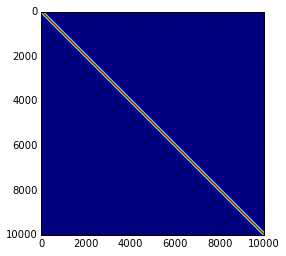

In [19]:
plt.imshow(D)

In [26]:
Ds = sparse.dia_matrix(D)

In [27]:
whos

Variable               Type          Data/Info
----------------------------------------------
D                      ndarray       20000x20000: 400000000 elems, type `float64`, 3200000000 bytes (3051 Mb)
Ds                     dia_matrix      (840, 0)	4.04884736422e<...> 19999)	4.04884736422e-11
gauss_kernel           function      <function gauss_kernel at 0x104045cf8>
gaussian_blur_matrix   function      <function gaussian_blur_matrix at 0x104045b90>
np                     module        <module 'numpy' from '/Us<...>ages/numpy/__init__.pyc'>
plt                    module        <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
sparse                 module        <module 'scipy.sparse' fr<...>ipy/sparse/__init__.pyc'>
x                      ndarray       5x5: 25 elems, type `int64`, 200 bytes


In [17]:
Ds

<1000x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 392380 stored elements (441 diagonals) in DIAgonal format>

In [3]:
Ds = sparse.csc_matrix((262144, 262144))

In [4]:
whos

Variable   Type          Data/Info
----------------------------------
Ds         csc_matrix    
np         module        <module 'numpy' from '/Us<...>ages/numpy/__init__.pyc'>
plt        module        <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
sparse     module        <module 'scipy.sparse' fr<...>ipy/sparse/__init__.pyc'>


In [9]:
sparse.csc_matrix?

In [10]:
data = np.array([[1, 2, 3, 4]]).repeat(3, axis=0)

In [11]:
data

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

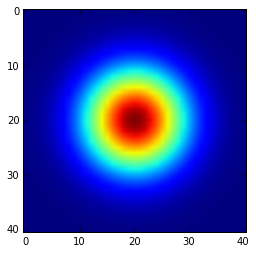

In [14]:
g = gauss_kernel(41,41)
plt.imshow(g)

In [4]:
D = smff.gaussian_blur_matrix_sparse(262144, 41, 20)

In [6]:
imd = D.toarray()[:100, :100]

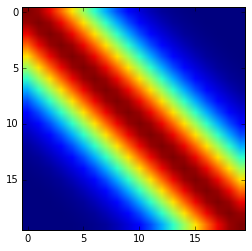

In [11]:
plt.imshow(imd[:20, :20])

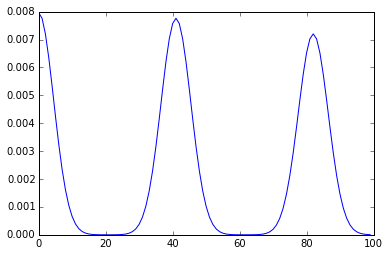

In [12]:
plt.plot(imd[0])